In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [92]:
# Load the dataset
churn_data = pd.read_csv('churn_data.csv')

# Display the first few rows of the dataset
churn_data.head()


customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [93]:
churn_data.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [97]:
churn_data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

## 1. Data Cleaning and Preparation

In [88]:
churn_data.shape

(7043, 9)

In [89]:
churn_data.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [73]:
# # Data Cleaning: Handle missing values
# churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
# churn_data.dropna(inplace=True)


In [74]:
churn_data.isna().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [98]:
 churn_data.select_dtypes(include=['object']).columns

Index(['customerID', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [99]:
churn_data.head()

customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0           Electronic check           29.85        29.85    No  
1               Mailed check           56.95       1889.5    No  
2               Mailed check           53.85       108.15   Yes  
3  Bank transfer (automatic)           42.30      1840.75    No  
4           Electronic check           70.70       151.65   Yes

In [103]:


# Encode categorical variables
label_encoders = {}
for column in churn_data.select_dtypes(include=['object']).columns:
    if column != 'customerID':
        label_encoders[column] = LabelEncoder()
        churn_data[column] = label_encoders[column].fit_transform(churn_data[column])

# Define the independent and dependent variables
X = churn_data.drop(columns=['customerID', 'Churn'])
y = churn_data['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
churn_data.head()

customerID  tenure  PhoneService  Contract  PaperlessBilling  \
0  7590-VHVEG       1             0         0                 1   
1  5575-GNVDE      34             1         1                 0   
2  3668-QPYBK       2             1         0                 1   
3  7795-CFOCW      45             0         1                 0   
4  9237-HQITU       2             1         0                 1   

   PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0              2           29.85          2505      0  
1              3           56.95          1466      0  
2              3           53.85           157      1  
3              0           42.30          1400      0  
4              2           70.70           925      1

### Purpose of the Code
### The purpose of this code is to encode categorical variables in the churn_data DataFrame into numerical 
### values. This is often necessary because many machine learning algorithms require numerical input and cannot   handle categorical data directly.

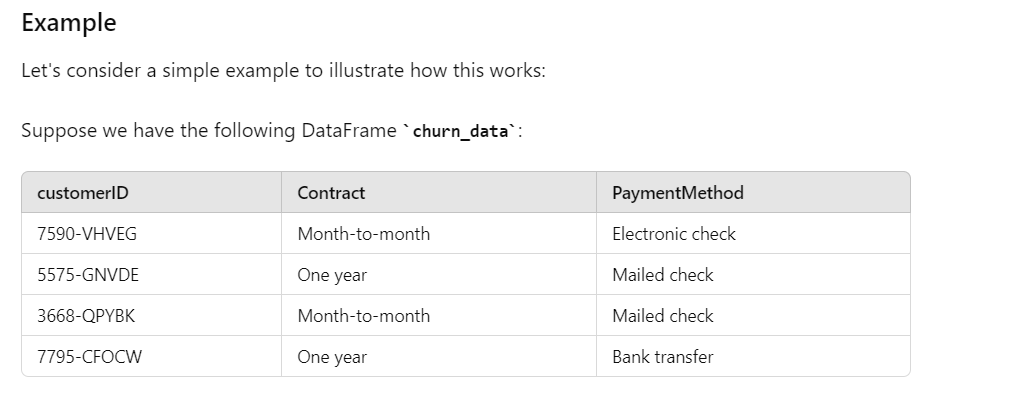

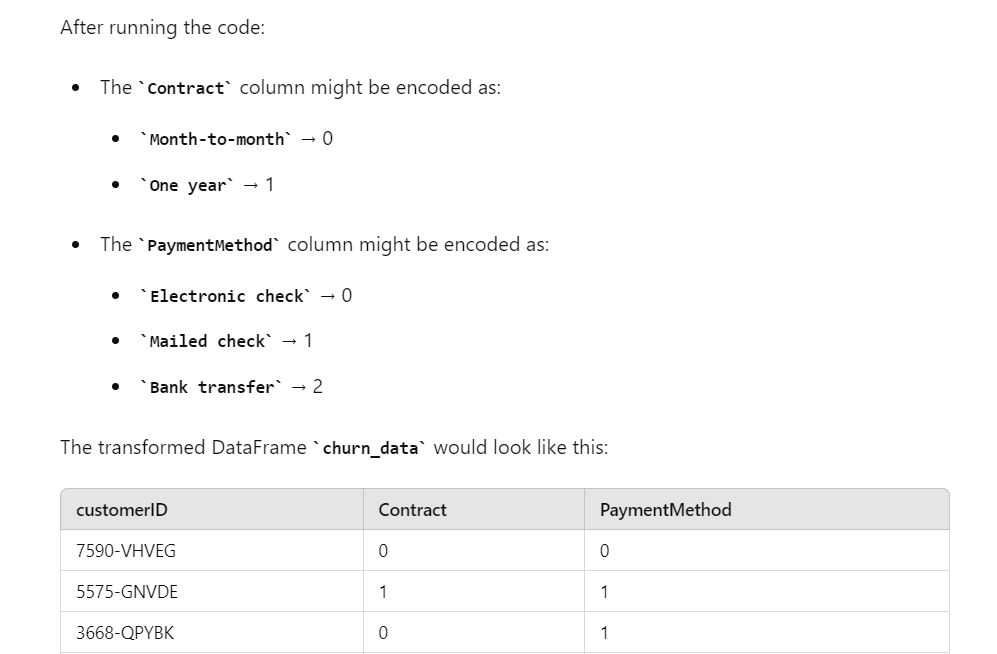

In [102]:
churn_data

customerID  tenure  PhoneService  Contract  PaperlessBilling  \
0     7590-VHVEG       1             0         0                 1   
1     5575-GNVDE      34             1         1                 0   
2     3668-QPYBK       2             1         0                 1   
3     7795-CFOCW      45             0         1                 0   
4     9237-HQITU       2             1         0                 1   
...          ...     ...           ...       ...               ...   
7038  6840-RESVB      24             1         1                 1   
7039  2234-XADUH      72             1         1                 1   
7040  4801-JZAZL      11             0         0                 1   
7041  8361-LTMKD       4             1         0                 1   
7042  3186-AJIEK      66             1         2                 1   

      PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 2           29.85          2505      0  
1                 3           56.95          1466      0  
2                 3           53.85           157      1  
3                 0           42.30          1400      0  
4                 2           70.70           925      1  
...             ...             ...           ...    ...  
7038              3           84.80          1597      0  
7039              1          103.20          5698      0  
7040              2           29.60          2994      0  
7041              3           74.40          2660      1  
7042              0          105.65          5407      0  

[7043 rows x 9 columns]

In [109]:
y_train.shape

(5634,)

In [105]:
X_train.head()

tenure  PhoneService  Contract  PaperlessBilling  PaymentMethod  \
2142      21             1         1                 0              3   
1623      54             1         2                 1              0   
6074       1             0         0                 1              2   
1362       4             1         0                 1              2   
6754       0             1         2                 1              0   

      MonthlyCharges  TotalCharges  
2142           64.85           610  
1623           97.20          4319  
6074           23.45          1940  
1362           70.20          2012  
6754           61.90             0

In [106]:
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int32

In [112]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


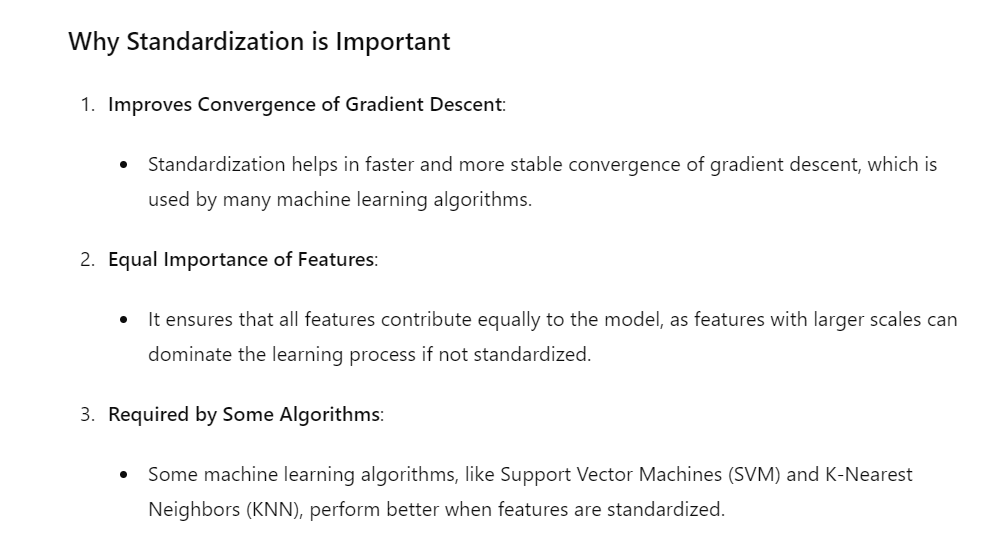

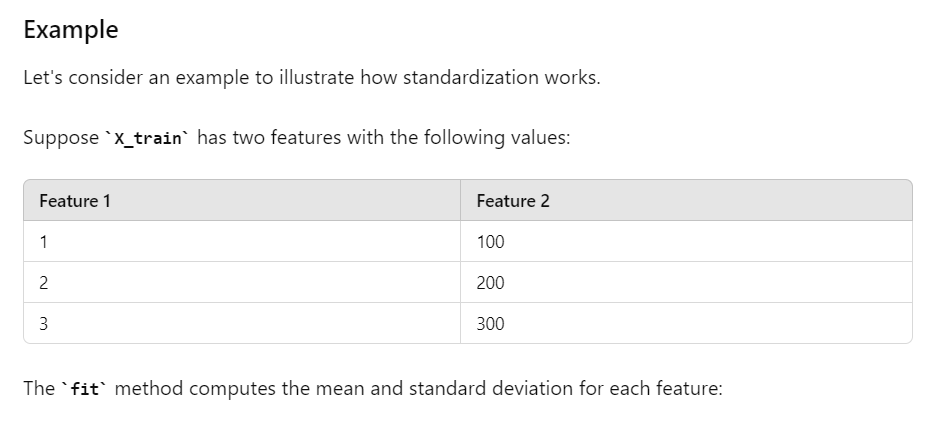

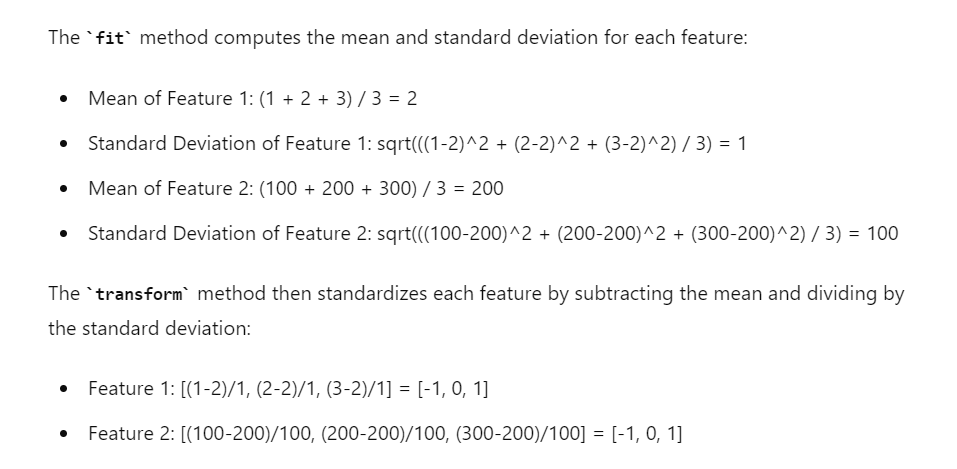

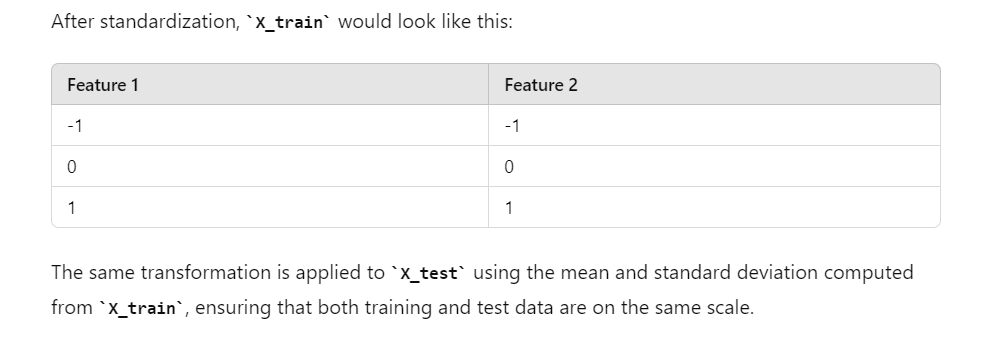

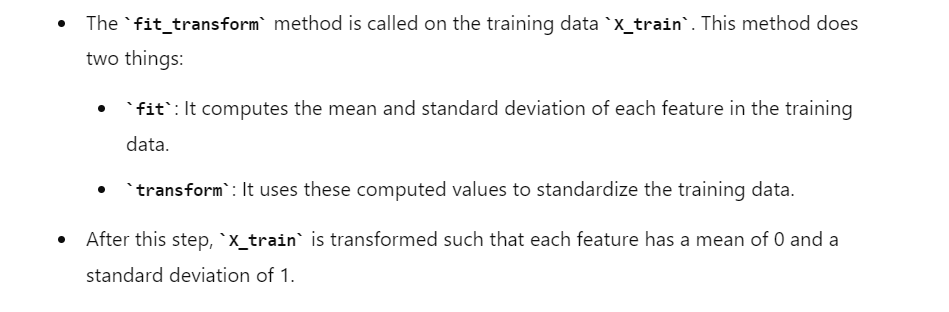

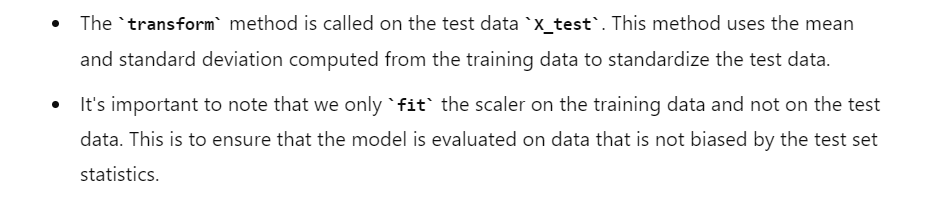

## 2. Building your First Model

In [115]:
X_train

array([[-4.65683364e-01,  3.29573443e-01,  3.72908354e-01, ...,
         1.33926673e+00, -4.73723375e-04, -1.40800618e+00],
       [ 8.85536787e-01,  3.29573443e-01,  1.57759050e+00, ...,
        -1.47094882e+00,  1.07475386e+00,  5.58360318e-01],
       [-1.28460467e+00, -3.03422506e+00, -8.31773795e-01, ...,
         4.02528212e-01, -1.37649913e+00, -7.02892284e-01],
       ...,
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01, -1.45294499e+00, -3.21706651e-01],
       [-8.34197950e-01,  3.29573443e-01, -8.31773795e-01, ...,
         4.02528212e-01,  1.14953785e+00, -1.53524478e+00],
       [-2.60953038e-01,  3.29573443e-01,  3.72908354e-01, ...,
        -5.34210304e-01, -1.49781538e+00,  3.30921324e-01]])

In [116]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## 3. Feature Elimination using RFE

In [117]:
from sklearn.feature_selection import RFE

# Initialize the model for RFE
rfe_model = LogisticRegression()

# Initialize RFE with the model
rfe = RFE(estimator=rfe_model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = rfe.support_

# Transform the datasets
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Retrain the model on the selected features
model.fit(X_train_rfe, y_train)

# Make predictions
y_pred_rfe = model.predict(X_test_rfe)


### RFE stands for Recursive Feature Elimination. It is a feature selection technique that recursively removes the least important features and builds a model using the remaining attributes.


### An RFE object is created with rfe_model as the estimator and n_features_to_select=5. This means RFE will select the top 5 most important features from the dataset.

### Various Model evaluation techniques

## 4. Confusion Matrix and Accuracy

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfe)
print("Confusion Matrix:\n", conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfe)
print("Accuracy: ", accuracy)


Confusion Matrix:
 [[937  99]
 [170 203]]
Accuracy:  0.8090844570617459


## 5. Metrics Beyond Accuracy: Sensitivity & Specificity

In [119]:
# Calculate sensitivity (recall) and specificity
from sklearn.metrics import recall_score

# Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred_rfe)
print("Sensitivity: ", sensitivity)

# Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rfe).ravel()
specificity = tn / (tn + fp)
print("Specificity: ", specificity)


Sensitivity:  0.5442359249329759
Specificity:  0.9044401544401545


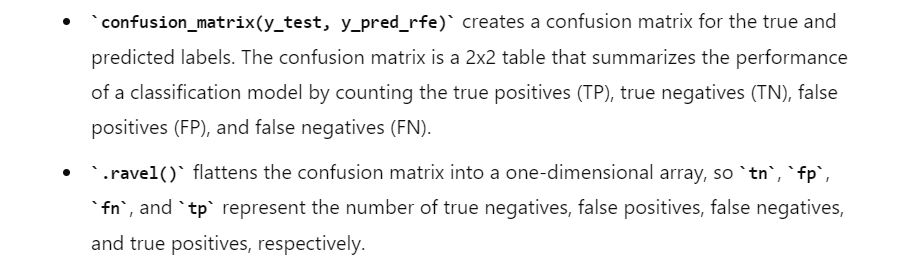


## 6. ROC Curve

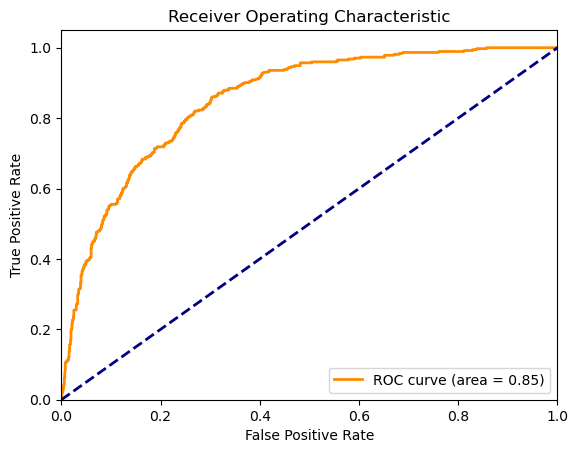

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_rfe)[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, model.predict_proba(X_test_rfe)[:, 1]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


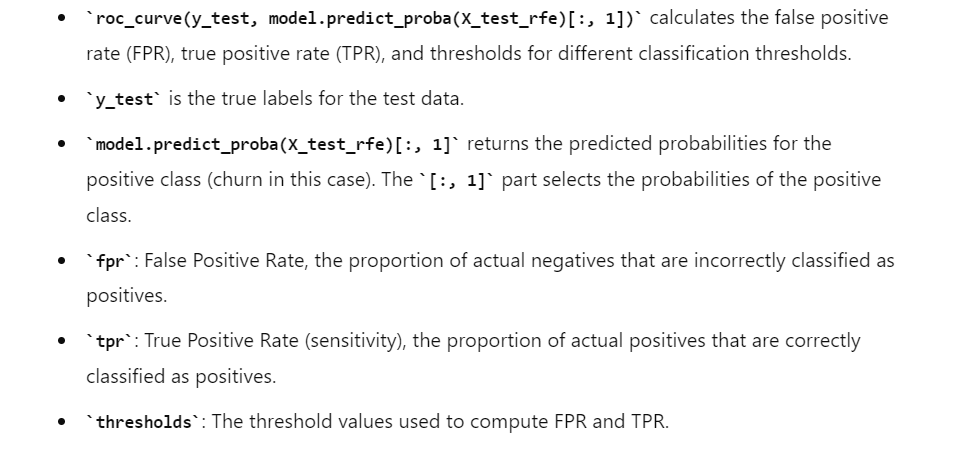

In [86]:
# # Find the optimal threshold
# optimal_idx = np.argmax(tpr - fpr)
# optimal_threshold = thresholds[optimal_idx]
# print("Optimal Threshold: ", optimal_threshold)


## 7. Model Evaluation Metrics - Exercise

In [87]:
# Calculate precision and recall
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred_rfe)
recall = recall_score(y_test, y_pred_rfe)

print("Precision: ", precision)
print("Recall: ", recall)


Precision:  0.6721854304635762
Recall:  0.5442359249329759


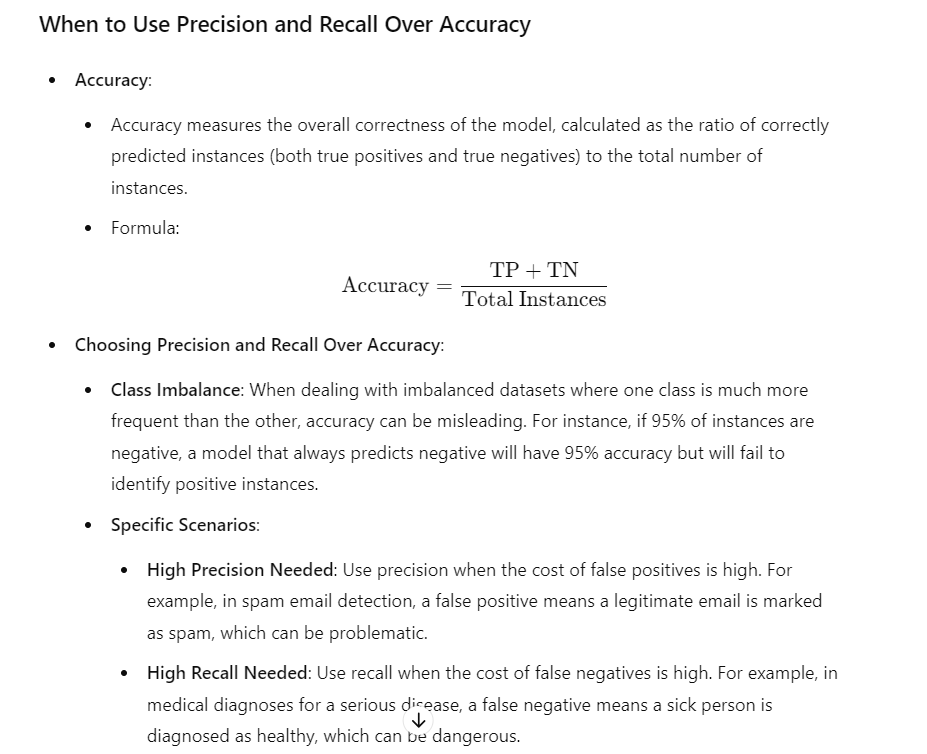